In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import numpy as np

# Chargement du fichier CSV
csv_path = "../data_Darija-SFT-Mixture/darija_data/csv_files/translations.csv"
df = pd.read_csv(csv_path)

# Affichage des premières lignes et informations sur le DataFrame
print("📊 Aperçu des données :")
display(df.head())

print("\n📝 Informations sur le DataFrame :")
display(df.info())

📊 Aperçu des données :


,dataset,id,messages_json,direction
0,doda,doda_570,"[{""content"":""ترجم من الفرنساوية للدارجة:\nQue ...",fr_dr
1,doda,doda_40164,"[{""content"":""ترجم من الفرنساوية للدارجة:\nElle...",fr_dr
2,doda,doda_32196,"[{""content"":""ترجم من الفرنساوية للدارجة:\nVeux...",fr_dr
3,flores+_few_shot,flores+_few_shot_366,"[{""content"":""ترجم من الفرنساوية للدارجة:\nIl a...",fr_dr
4,doda_few_shot,doda_few_shot_3600,"[{""content"":""ترجم من الفرنساوية للدارجة:\ncomm...",fr_dr



📝 Informations sur le DataFrame :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48068 entries, 0 to 48067
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   dataset        48068 non-null  object
 1   id             48068 non-null  object
 2   messages_json  48068 non-null  object
 3   direction      48068 non-null  object
dtypes: object(4)
memory usage: 1.5+ MB


None

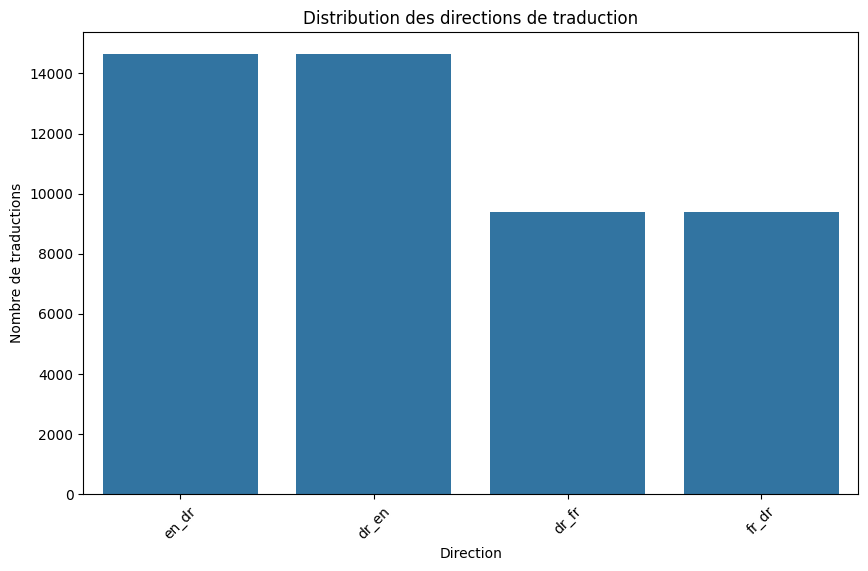


📊 Statistiques des directions de traduction :


direction
en_dr    14637
dr_en    14637
dr_fr     9397
fr_dr     9397
Name: count, dtype: int64

In [9]:
# Distribution des directions de traduction
plt.figure(figsize=(10, 6))
direction_counts = df['direction'].value_counts()
sns.barplot(x=direction_counts.index, y=direction_counts.values)
plt.title('Distribution des directions de traduction')
plt.xlabel('Direction')
plt.ylabel('Nombre de traductions')
plt.xticks(rotation=45)
plt.show()

# Affichage des statistiques
print("\n📊 Statistiques des directions de traduction :")
display(direction_counts)

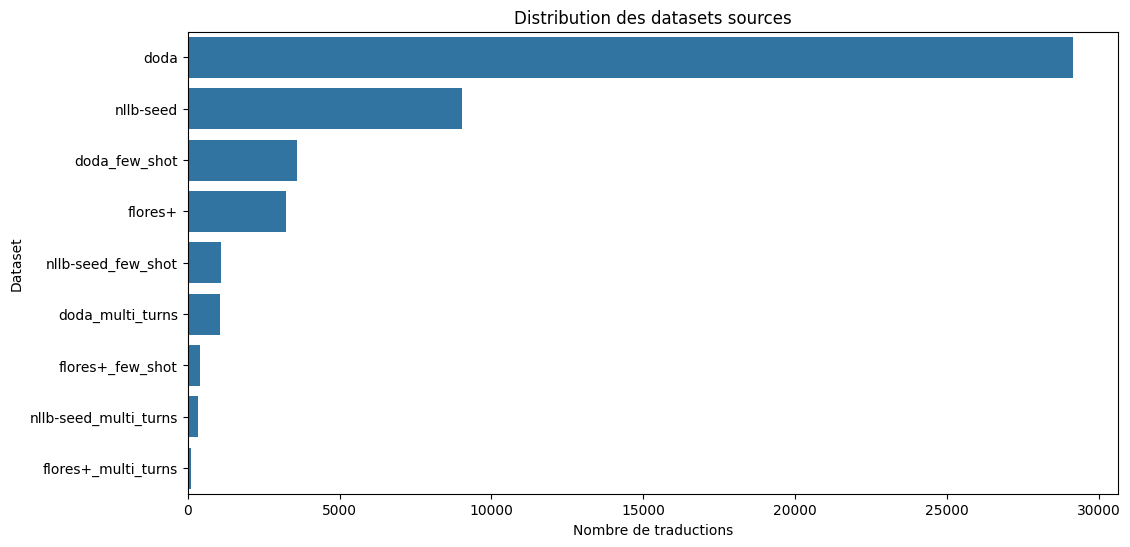


📊 Statistiques des datasets :


dataset
doda                     29160
nllb-seed                 9030
doda_few_shot             3600
flores+                   3228
nllb-seed_few_shot        1114
doda_multi_turns          1080
flores+_few_shot           400
nllb-seed_multi_turns      336
flores+_multi_turns        120
Name: count, dtype: int64

In [10]:
# Distribution des datasets
plt.figure(figsize=(12, 6))
dataset_counts = df['dataset'].value_counts()
sns.barplot(x=dataset_counts.values, y=dataset_counts.index)
plt.title('Distribution des datasets sources')
plt.xlabel('Nombre de traductions')
plt.ylabel('Dataset')
plt.show()

print("\n📊 Statistiques des datasets :")
display(dataset_counts)

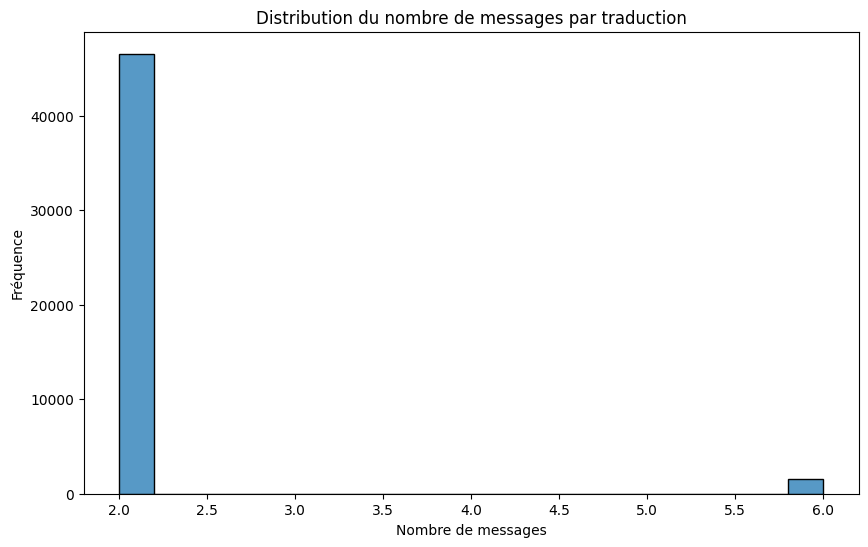


📊 Statistiques sur le nombre de messages :


count    48068.000000
mean         2.127652
std          0.703083
min          2.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          6.000000
Name: nb_messages, dtype: float64

In [11]:
# Conversion des messages JSON en liste
import json

def parse_messages(messages_json):
    try:
        return json.loads(messages_json)
    except:
        return None

# Analyse de la longueur des messages
df['messages_list'] = df['messages_json'].apply(parse_messages)
df['nb_messages'] = df['messages_list'].apply(lambda x: len(x) if x is not None else 0)

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='nb_messages', bins=20)
plt.title('Distribution du nombre de messages par traduction')
plt.xlabel('Nombre de messages')
plt.ylabel('Fréquence')
plt.show()

print("\n📊 Statistiques sur le nombre de messages :")
display(df['nb_messages'].describe())